In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import polars as pl
import numpy as np

In [2]:
edges = pl.read_csv("edgelists1.csv") #loading data
nodes = pl.read_csv("node_info1.csv")
print(edges)

id_list = edges['id'].unique(maintain_order=True).to_list() #keeps the main order
#id_list = sorted(edges['id'].unique().to_list()) #alphabetical sort 
print(id_list)

all_deg = []


def makegraph(a): 
    edges_group = edges.filter(pl.col('id') == a)
    G = nx.from_pandas_edgelist(edges_group, source = 'from', target = 'to') #Get the information from the tables df with node being from, target being to, and edges from connectivity (which one the node is connected to)
    #nx.draw(G, node_color = 'blue', node_size = 10, edgecolors='black', alpha = 0.7) #This draws the graph with specified node color, size, edge color and transparency
    #plt.title(a)  # add a title for each graph
    #plt.show()
    degrees = [d for n, d in G.degree()] #for each node in the node/degree dict, takes just the degrees into a list
    less2 = [d for d in degrees if d < 2]
    p = len(less2)/len(degrees)
    r = 2
    md = np.mean(degrees)
    vd = np.var(degrees)
    return md, vd

mean_degree = []
var_degree = []
for idx in id_list:
    md, vd = makegraph(idx)
    mean_degree.append(md.item())
    var_degree.append(vd.item())
#for i in id_list: #there's 382 networks so idk how we can make all of them and display 
#    makegraph(i)






shape: (3_259, 3)
┌─────────────────────┬──────┬─────┐
│ id                  ┆ from ┆ to  │
│ ---                 ┆ ---  ┆ --- │
│ str                 ┆ str  ┆ str │
╞═════════════════════╪══════╪═════╡
│ aus.2000.meas.1.00  ┆ P1   ┆ P2  │
│ aus.2000.meas.1.00  ┆ P1   ┆ P3  │
│ aus.2000.meas.1.00  ┆ P3   ┆ P4  │
│ aus.2000.meas.1.00  ┆ P3   ┆ P5  │
│ aus.2003.meas.1.00  ┆ P1   ┆ P2  │
│ …                   ┆ …    ┆ …   │
│ rou.2020.covid.1.16 ┆ P1   ┆ P2  │
│ rou.2020.covid.1.17 ┆ P1   ┆ P2  │
│ rou.2020.covid.1.18 ┆ P1   ┆ P2  │
│ rou.2020.covid.1.19 ┆ P1   ┆ P2  │
│ rou.2020.covid.1.20 ┆ P1   ┆ P2  │
└─────────────────────┴──────┴─────┘
['aus.2000.meas.1.00', 'aus.2003.meas.1.00', 'aus.2010.meas.1.00', 'bgd.2001.nph.1.01', 'bgd.2001.nph.1.02', 'bgd.2001.nph.1.03', 'bgd.2001.nph.1.04', 'bgd.2001.nph.1.05', 'bgd.2001.nph.1.06', 'bgd.2001.nph.1.07', 'bgd.2001.nph.1.08', 'bgd.2001.nph.1.11', 'bgd.2001.nph.1.12', 'bgd.2001.nph.1.13', 'bgd.2001.nph.1.14', 'bgd.2001.nph.1.15', 'bgd.2001.nph

In [3]:
mean_degree

[1.6,
 1.9090909090909092,
 1.7777777777777777,
 1.3333333333333333,
 1.6,
 1.6,
 1.6666666666666667,
 1.0,
 1.0,
 1.3333333333333333,
 1.0,
 1.6,
 1.8333333333333333,
 1.0,
 1.5,
 1.7142857142857142,
 1.0,
 1.9411764705882353,
 1.9473684210526316,
 1.9746835443037976,
 1.0,
 1.9714285714285715,
 1.95,
 1.9375,
 1.0,
 1.0,
 1.75,
 1.5,
 1.9393939393939394,
 1.7142857142857142,
 1.935483870967742,
 1.3333333333333333,
 1.3333333333333333,
 1.0,
 1.6666666666666667,
 1.945945945945946,
 1.9714285714285715,
 1.8181818181818181,
 1.7777777777777777,
 1.8666666666666667,
 1.9523809523809523,
 1.6666666666666667,
 1.9090909090909092,
 1.3333333333333333,
 1.8888888888888888,
 1.75,
 1.6666666666666667,
 1.3333333333333333,
 1.0,
 1.5,
 1.0,
 1.9591836734693877,
 1.8571428571428572,
 1.989247311827957,
 1.9393939393939394,
 1.7777777777777777,
 1.951219512195122,
 1.9,
 1.96,
 1.8823529411764706,
 1.9047619047619047,
 1.8888888888888888,
 1.9090909090909092,
 1.9130434782608696,
 1.8823529411

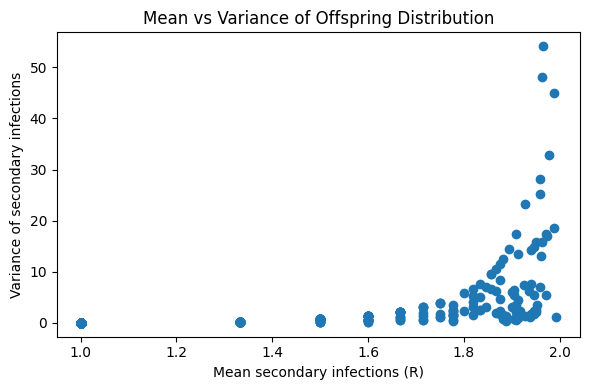

In [4]:
# mean_degree and var_degree assumed to be 1D numpy arrays of same length

plt.figure(figsize=(6,4))

plt.scatter(mean_degree, var_degree)

plt.xlabel("Mean secondary infections (R)")
plt.ylabel("Variance of secondary infections")
plt.title("Mean vs Variance of Offspring Distribution")

plt.tight_layout()
plt.savefig("mean_var_scatter.png", dpi=300, bbox_inches="tight")

plt.show()


Loads two CSVs (edgelists1.csv, node_info1.csv) and builds one combined graph over all outbreaks.

(Recommended) Uses composite node IDs like "{id}:{name}" so identical names (e.g., P1) from different outbreaks don’t collide.

Constructs a directed graph (default) so each node’s out-degree = secondary infections; can switch to undirected with use_out_degree=False.

Extracts the degree vector for all nodes (including zeros).

Fits a Negative Binomial (NB) to the empirical degree distribution 


Plots a histogram of degrees (0–30) and overlays the NB PMF using the fitted parameters.

Labels axes/legend and shows the sample mean and variance in the title.

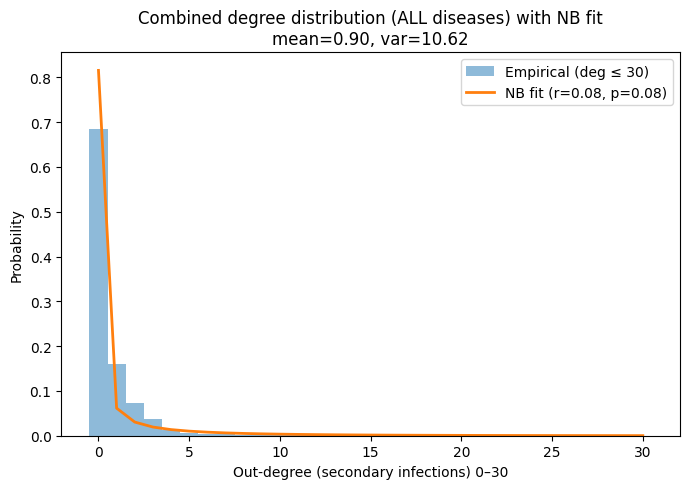

In [5]:
# Plot degree histogram with Negative Binomial (NB) fit — ALL DISEASES COMBINED

import polars as pl
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import nbinom

EDGES_CSV = "edgelists1.csv"
NODES_CSV = "node_info1.csv"

# --- Helper: method-of-moments NB fit on {0,1,2,...} ---
def fit_nb_mom(deg: np.ndarray):
 
    if deg.size == 0:
        raise ValueError("Empty degree array.")
    m = deg.mean()
    s2 = deg.var(ddof=1) if deg.size > 1 else 0.0
    if m > 0 and s2 > m:
        r_hat = (m**2) / (s2 - m)
        p_hat = r_hat / (r_hat + m)
    else:
        r_hat = 1e9
        p_hat = r_hat / (r_hat + m) if m > 0 else 0.999999999
    return r_hat, p_hat, m, s2

def main(use_out_degree: bool = True, max_plot: int = 30):
    # Load data
    edges_df = pl.read_csv(EDGES_CSV)
    nodes_df = pl.read_csv(NODES_CSV)

    # Build edge list and node list with the correct columns
    # (your files use 'from','to' for edges and 'name' for node IDs)
    edge_pairs = [(f"{i}:{u}", f"{i}:{v}") for i, u, v in edges_df.select(["id", "from", "to"]).rows()]
    node_names = [f"{i}:{n}" for i, n in nodes_df.select(["id", "name"]).rows()]

    # Graph across ALL diseases (combined)
    if use_out_degree:
        G = nx.DiGraph()
    else:
        G = nx.Graph()

    G.add_nodes_from(node_names)
    G.add_edges_from(edge_pairs)

    # Degree vector (include nodes with zero degree)
    if use_out_degree and isinstance(G, nx.DiGraph):
        deg = np.array([d for _, d in G.out_degree(node_names)], dtype=float)
        x_label = f"Out-degree (secondary infections) 0–{max_plot}"
    else:
        deg = np.array([d for _, d in G.degree(node_names)], dtype=float)
        x_label = f"Degree 0–{max_plot}"

    if deg.size == 0:
        raise ValueError("Degree sequence is empty after graph construction.")

    # Fit NB
    r_hat, p_hat, m, s2 = fit_nb_mom(deg)

    # Histogram + NB PMF overlay
    deg_int = deg.astype(int)
    xmax = int(deg_int.max())
    x = np.arange(0, min(xmax, max_plot) + 1)
    pmf_nb = nbinom.pmf(x, r_hat, p_hat, loc=0)

    plt.figure(figsize=(7, 5))
    plt.hist(
        deg_int[deg_int <= max_plot],
        bins=np.arange(-0.5, max_plot + 1.5, 1),
        density=True, alpha=0.5, label=f"Empirical (deg ≤ {max_plot})"
    )
    plt.plot(x, pmf_nb, lw=2, label=f"NB fit (r={r_hat:.2f}, p={p_hat:.2f})")
    plt.xlabel(x_label)
    plt.ylabel("Probability")
    plt.title(f"Combined degree distribution (ALL diseases) with NB fit\nmean={m:.2f}, var={s2:.2f}")
    plt.legend()
    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    # use_out_degree=True → transmission (secondary infections); False → undirected contact degree
    main(use_out_degree=True, max_plot=30)



=== chn.2003.sars.1.00 ===
Cases: 79
Mean (R proxy): 0.9873
Variance:       18.1152
k (dispersion): 0.0569156
p:              0.054503


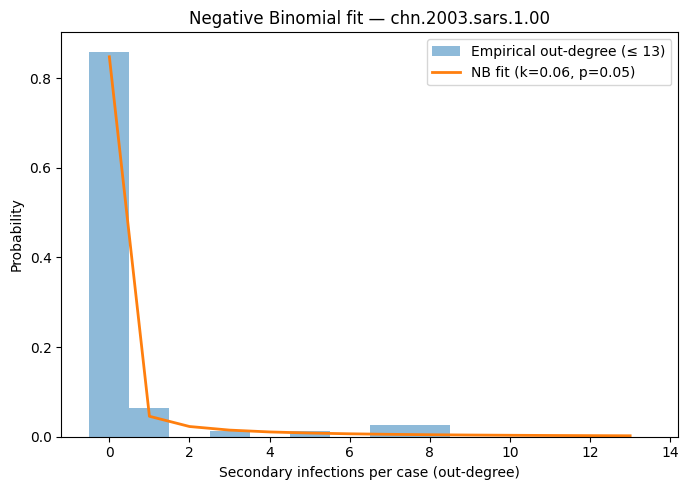


=== kor.2015.mers.1.00 ===
Cases: 186
Mean (R proxy): 0.9946
Variance:       45.5189
k (dispersion): 0.0222188
p:              0.021851


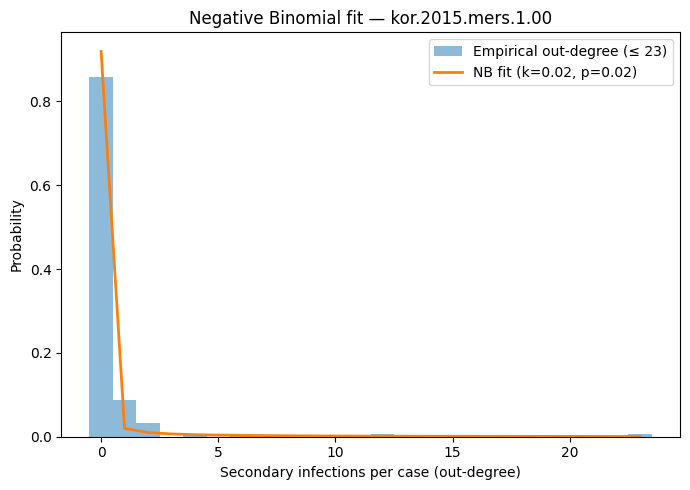


=== chn.2020.covid.1.00 ===
Cases: 20
Mean (R proxy): 0.9500
Variance:       3.6289
k (dispersion): 0.336886
p:              0.261784


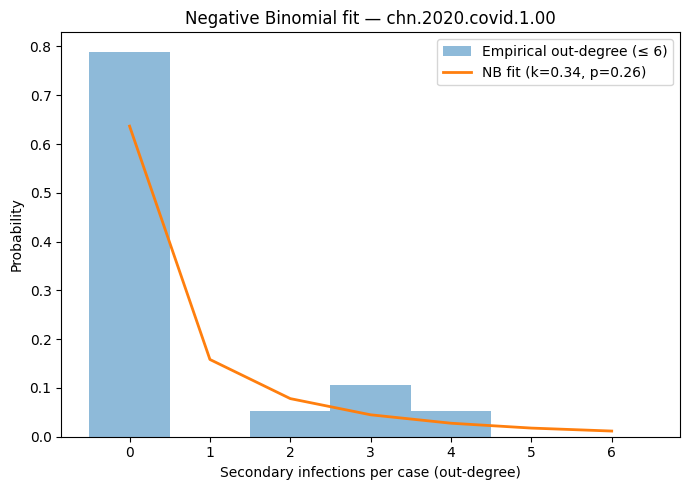

In [6]:
import polars as pl
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import nbinom  

# Path to edge list CSV. Expected columns: id, from, to
EDGES_PATH = "edgelists1.csv"

# Outbreak IDs 
TARGET_DISEASES = ["chn.2003.sars.1.00", "kor.2015.mers.1.00", "chn.2020.covid.1.00"]

# Load edges (id, from, to) 
edges_df = pl.read_csv(EDGES_PATH)  # columns: id, from, to

# Build a namespaced directed graph:
#   - Use DiGraph so out-degree = number of secondary infections
#   - Prefix each node with its outbreak id (e.g., "chn.2003.sars.1.00:P1")
G = nx.DiGraph()
for rid, u, v in edges_df.select(["id", "from", "to"]).rows():
    u_ns = f"{rid}:{u}"  # namespaced source node
    v_ns = f"{rid}:{v}"  # namespaced target node
    G.add_edge(u_ns, v_ns)

# Method-of-moments Negative Binomial 
# Returns:
#   mean (sample mean), var (sample variance, ddof=1),
#   k (dispersion / "size" parameter in NB), p (success probability in SciPy's nbinom)
# Notes:
#   - If variance <= mean, data are not overdispersed; we approximate a Poisson by k → large.
def fit_nb_mom(sample):
    x = np.asarray(sample, dtype=float)
    if x.size == 0:
        return dict(mean=0.0, var=0.0, k=np.inf, p=1.0)
    m = x.mean()
    s2 = x.var(ddof=1) if x.size > 1 else 0.0
    if m <= 0:
        # No infections on average; NB undefined ⇒ return Poisson-like limit
        return dict(mean=m, var=s2, k=np.inf, p=1.0)
    if s2 > m:
        # Overdispersed: solve method-of-moments for NB parameters
        #   Var = m + m^2/k  ⇒  k = m^2 / (Var - m)
        #   mean = r(1-p)/p with r=k  ⇒  p = k/(k+m)
        k = (m**2) / (s2 - m)
        p = k / (k + m)
    else:
        # Not overdispersed (Poisson-like): emulate Poisson by taking k very large
        k = 1e12
        p = k / (k + m)
    return dict(mean=m, var=s2, k=k, p=p)

# Fit NB and plot the histogram + NB PMF for each outbreak separately
for outbreak in TARGET_DISEASES:
    # Collect nodes that belong to this outbreak by namespaced prefix
    nodes_d = [n for n in G.nodes if n.startswith(outbreak + ":")]
    if not nodes_d:
        print(f"[WARN] No nodes found for {outbreak}. Check the id string.")
        continue

    # Induced subgraph for the outbreak
    H = G.subgraph(nodes_d).copy()

    # Secondary infections per case = out-degree in the directed graph
    deg_out = np.array([H.out_degree(n) for n in nodes_d], dtype=int)

    # Fit Negative Binomial via MoM
    fit = fit_nb_mom(deg_out)

    # Console summary
    print(f"\n=== {outbreak} ===")
    print(f"Cases: {len(deg_out)}")
    print(f"Mean (R proxy): {fit['mean']:.4f}")
    print(f"Variance:       {fit['var']:.4f}")
    print(f"k (dispersion): {fit['k']:.6g}")
    print(f"p:              {fit['p']:.6f}")

    # Plot: empirical histogram of out-degree and the fitted NB PMF over 0..xmax_plot
    if len(deg_out) > 0:
        # Choose a readable x-maximum (99th percentile, capped at 40)
        xmax_plot = min(int(np.percentile(deg_out, 99)), 40)
        x = np.arange(0, xmax_plot + 1)

        # SciPy NB parameterization: nbinom.pmf(k; r=k, p=p) on {0,1,2,...}
        pmf_nb = nbinom.pmf(x, fit["k"], fit["p"], loc=0)

        plt.figure(figsize=(7, 5))
        plt.hist(
            deg_out[deg_out <= xmax_plot],
            bins=np.arange(-0.5, xmax_plot + 1.5, 1),
            density=True, alpha=0.5,
            label=f"Empirical out-degree (≤ {xmax_plot})"
        )
        plt.plot(x, pmf_nb, lw=2, label=f"NB fit (k={fit['k']:.2f}, p={fit['p']:.2f})")
        plt.xlabel("Secondary infections per case (out-degree)")
        plt.ylabel("Probability")
        plt.title(f"Negative Binomial fit — {outbreak}")
        plt.legend()
        plt.tight_layout()
        plt.show()


For each target outbreak ID:

Compute secondary infections per node = how many people each case infected (out-degree).

Plot a scatter of those per-node counts (one figure per disease).

Compute the mean and variance of those counts.

After looping through all diseases, plot a combined scatter of mean vs. variance (one point per disease).

Save a CSV summary (secondary_infection_stats.csv) with the metrics.

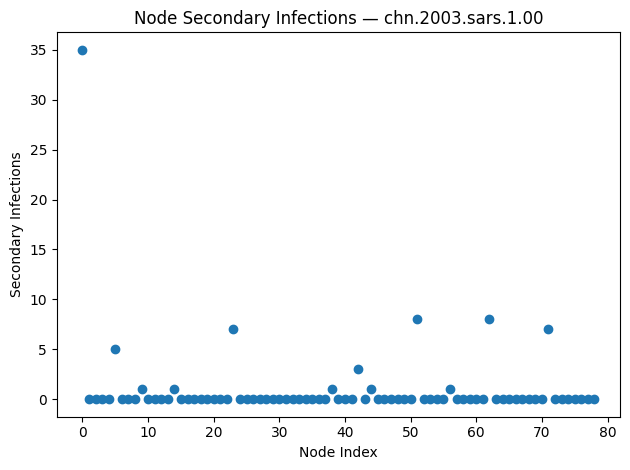

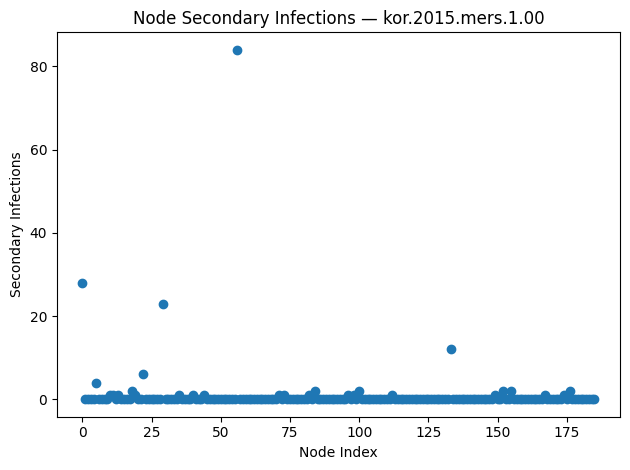

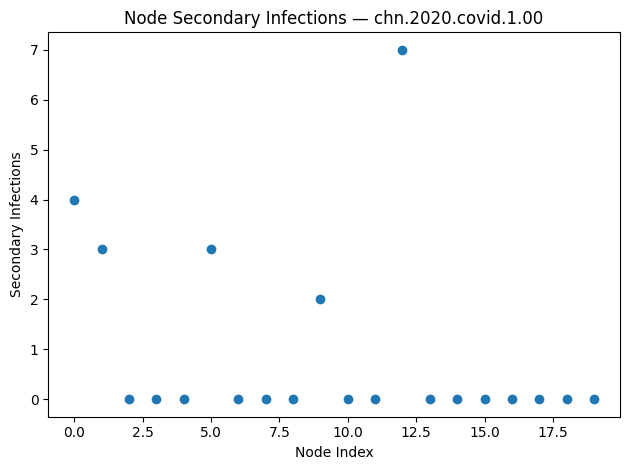

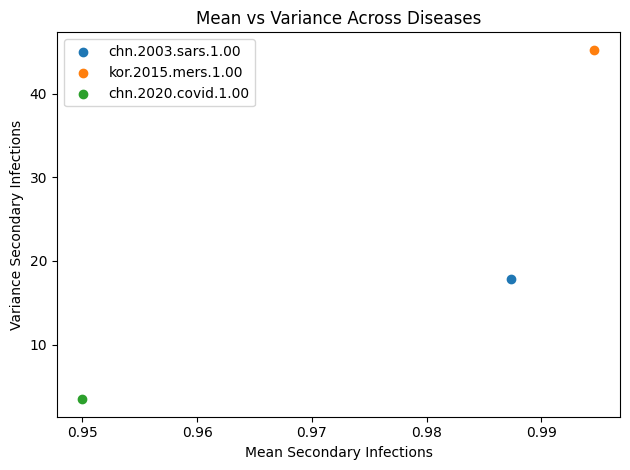

Saved summary to C:\Users\benwu\OneDrive - University of Virginia\BIOL4559HW\secondary_infection_stats.csv


In [7]:


import polars as pl
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

EDGES_CSV = "edgelists1.csv"
NODES_CSV = "node_info1.csv"
TARGET_DISEASES = ["chn.2003.sars.1.00", "kor.2015.mers.1.00", "chn.2020.covid.1.00"]

def per_disease_secondary_counts(edges: pl.DataFrame, nodes: pl.DataFrame, disease_id: str) -> pl.DataFrame:
    e = edges.filter(pl.col("id") == disease_id)
    n = nodes.filter(pl.col("id") == disease_id).select("name")

    # out-degree = number of times a case appears as `from` in the edge list
    out_counts = (
        e.group_by("from")
         .len()
         .rename({"from": "name", "len": "secondary_infections"})
    )

    # join to ensure nodes with no onward infections show as 0
    per_node = (
        n.join(out_counts, on="name", how="left")
         .with_columns(pl.col("secondary_infections").fill_null(0))
         .with_columns(pl.col("secondary_infections").cast(pl.Float64))
    )
    return per_node

def plot_node_scatter(per_node: pl.DataFrame, disease_id: str) -> None:
    y = per_node["secondary_infections"].to_numpy()
    x = np.arange(len(y))
    plt.figure()
    plt.scatter(x, y, marker="o")
    plt.xlabel("Node Index")
    plt.ylabel("Secondary Infections")
    plt.title(f"Node Secondary Infections — {disease_id}")
    plt.tight_layout()
    plt.show()

def main():
    edges = pl.read_csv(EDGES_CSV)
    nodes = pl.read_csv(NODES_CSV)

    results = []  # store (disease, mean, variance, n_nodes, n_edges)

    for disease in TARGET_DISEASES:
        per_node = per_disease_secondary_counts(edges, nodes, disease)
        counts = per_node["secondary_infections"].to_numpy()
        mean_val = float(np.mean(counts))
        var_val = float(np.var(counts, ddof=0))  # population variance

        # node-level scatter
        plot_node_scatter(per_node, disease)

        # collect summary
        n_edges = int(edges.filter(pl.col("id") == disease).height)
        results.append({
            "disease": disease,
            "mean_secondary_infections": mean_val,
            "variance_secondary_infections": var_val,
            "n_nodes": int(per_node.height),
            "n_edges": n_edges,
        })

    # mean-vs-variance combined scatter
    plt.figure()
    for r in results:
        plt.scatter(r["mean_secondary_infections"], r["variance_secondary_infections"], label=r["disease"], marker="o")
    plt.xlabel("Mean Secondary Infections")
    plt.ylabel("Variance Secondary Infections")
    plt.title("Mean vs Variance Across Diseases")
    plt.legend()
    plt.tight_layout()
    plt.show()

    # save summary CSV
    out = pl.DataFrame(results)
    out_path = Path("secondary_infection_stats.csv")
    out.write_csv(out_path)
    print(f"Saved summary to {out_path.resolve()}")

if __name__ == "__main__":
    main()



=== chn.2003.sars.1.00 ===
Cases: 79
Mean (R proxy): 0.9873
Variance:       18.1152
k (dispersion): 0.0569156
p:              0.054503


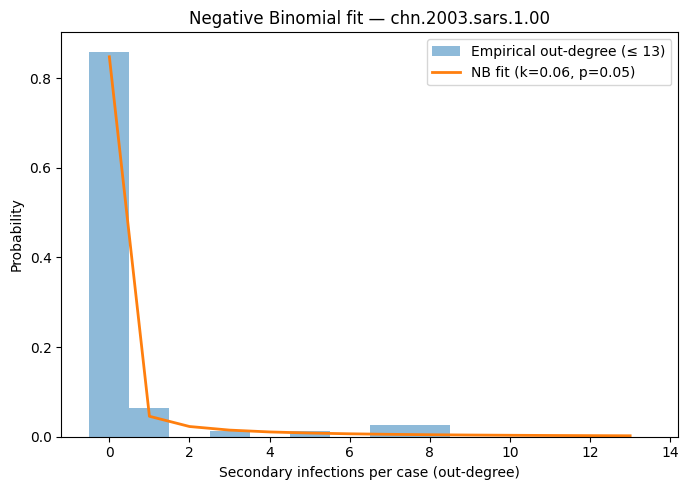

Mean final size over 1000 sims: 171.49
Median final size:                  17.00
Extinction probability by gen 20: 0.963


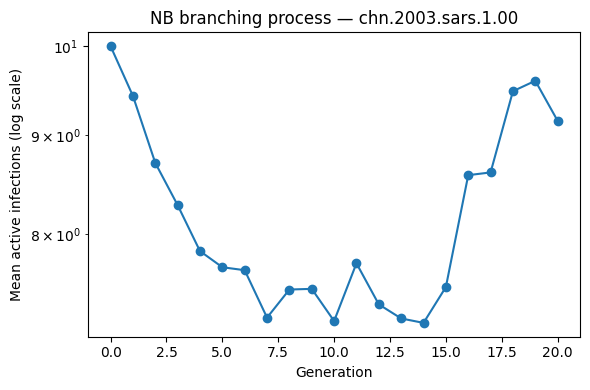


=== kor.2015.mers.1.00 ===
Cases: 186
Mean (R proxy): 0.9946
Variance:       45.5189
k (dispersion): 0.0222188
p:              0.021851


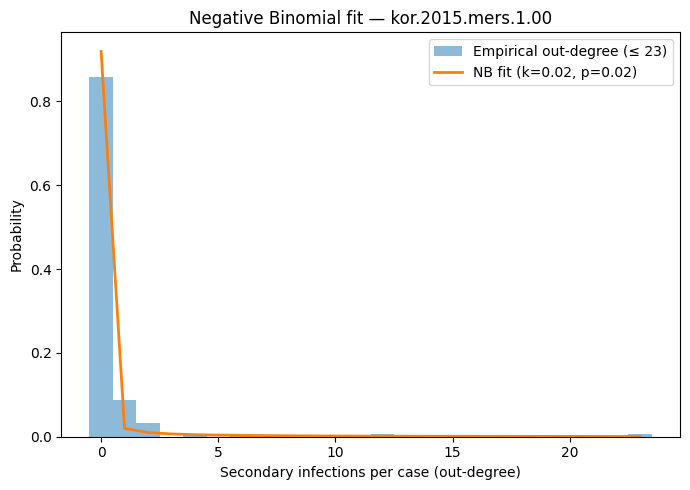

Mean final size over 1000 sims: 216.75
Median final size:                  11.00
Extinction probability by gen 20: 0.976


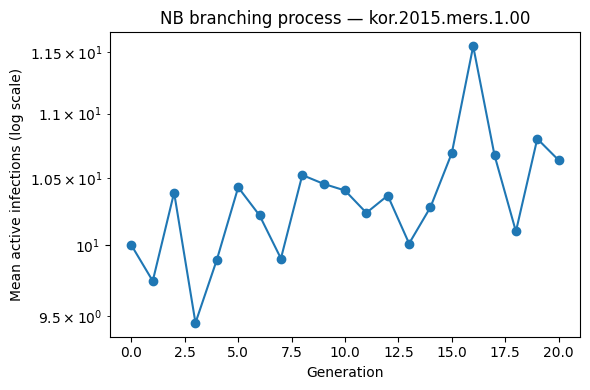


=== chn.2020.covid.1.00 ===
Cases: 20
Mean (R proxy): 0.9500
Variance:       3.6289
k (dispersion): 0.336886
p:              0.261784


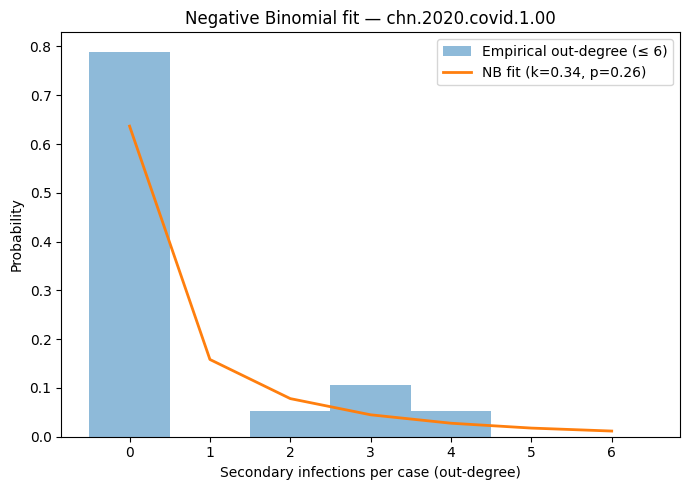

Mean final size over 1000 sims: 131.48
Median final size:                  47.50
Extinction probability by gen 20: 0.871


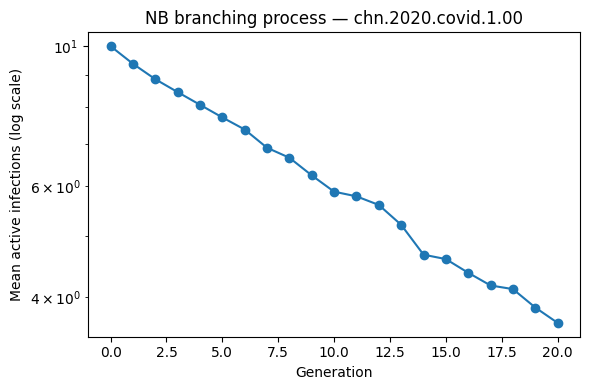

In [8]:
import polars as pl
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import nbinom  

# -----------------------------
#  Paths and outbreak selection
# -----------------------------
EDGES_PATH = "edgelists1.csv"

TARGET_DISEASES = [
    "chn.2003.sars.1.00",
    "kor.2015.mers.1.00",
    "chn.2020.covid.1.00",
]

# -----------------------------
#  Load edges and build graph
# -----------------------------
edges_df = pl.read_csv(EDGES_PATH)  # expected columns: id, from, to

# Build a namespaced directed graph:
#   node format: "<outbreak_id>:<case_name>" (e.g. "chn.2003.sars.1.00:P1")
G = nx.DiGraph()
for rid, u, v in edges_df.select(["id", "from", "to"]).rows():
    u_ns = f"{rid}:{u}"
    v_ns = f"{rid}:{v}"
    G.add_edge(u_ns, v_ns)

# -----------------------------
#  Method-of-moments NB fitting
# -----------------------------
def fit_nb_mom(sample):
    """
    Fit a Negative Binomial to non-negative integer data via method-of-moments.

    Returns dict:
        - mean: sample mean
        - var:  sample variance (ddof=1)
        - k:    dispersion / "size" parameter
        - p:    success probability in SciPy's nbinom (on {0,1,2,...})

    NB parameterization (epidemic-style):
        Var = m + m^2 / k
        m = k(1-p)/p  =>  p = k / (k + m)
    """
    x = np.asarray(sample, dtype=float)
    if x.size == 0:
        return dict(mean=0.0, var=0.0, k=np.inf, p=1.0)

    m = x.mean()
    s2 = x.var(ddof=1) if x.size > 1 else 0.0

    if m <= 0:
        # no infections on average; NB not meaningful
        return dict(mean=m, var=s2, k=np.inf, p=1.0)

    if s2 > m:
        # overdispersed → true NB
        k = (m**2) / (s2 - m)
        p = k / (k + m)
    else:
        # not overdispersed → approximate Poisson by taking k very large
        k = 1e12
        p = k / (k + m)

    return dict(mean=m, var=s2, k=k, p=p)

# -----------------------------
#  Branching process simulator
# -----------------------------
def simulate_branching(fit, max_generations=10, initial_cases=1, rng=None):
    """
    Galton–Watson branching process with NB offspring.

    - fit: dict from fit_nb_mom with keys 'mean', 'k', 'p'
    - max_generations: simulate generations G0..G_max
    - initial_cases: number of index cases at generation 0
    - rng: numpy.random.Generator (optional)

    Returns:
        list[int] = number of ACTIVE infections per generation [G0, G1, ..., G_max]
    """
    if rng is None:
        rng = np.random.default_rng()

    mu = fit["mean"]
    k  = fit["k"]
    p  = fit["p"]

    # If k is huge or infinite, treat as Poisson-like to avoid huge shape
    poisson_like = (k > 1e8) or np.isinf(k)

    sizes = [int(initial_cases)]
    current = int(initial_cases)

    for _ in range(max_generations):
        if current == 0:
            sizes.append(0)
            continue

        if poisson_like:
            # Sum of 'current' Poisson(mu) RVs ~ Poisson(current * mu)
            new_cases = np.random.poisson(mu * current)
        else:
            # Sum of 'current' NB(k, p) RVs ~ NB(current * k, p)
            r_total = current * k
            new_cases = nbinom.rvs(r_total, p, loc=0, random_state=rng)

        new_cases = int(new_cases)
        sizes.append(new_cases)
        current = new_cases

    return sizes

# -----------------------------
#  Main analysis & simulation
# -----------------------------
rng = np.random.default_rng(42)

for outbreak in TARGET_DISEASES:
    # Collect namespaced nodes that belong to this outbreak
    nodes_d = [n for n in G.nodes if n.startswith(outbreak + ":")]
    if not nodes_d:
        print(f"[WARN] No nodes found for {outbreak}. Check the id string.")
        continue

    # Induced subgraph for this outbreak
    H = G.subgraph(nodes_d).copy()

    # Secondary infections per case = out-degree in the directed graph
    deg_out = np.array([H.out_degree(n) for n in nodes_d], dtype=int)

    # Fit Negative Binomial via method-of-moments
    fit = fit_nb_mom(deg_out)

    # Console summary
    print(f"\n=== {outbreak} ===")
    print(f"Cases: {len(deg_out)}")
    print(f"Mean (R proxy): {fit['mean']:.4f}")
    print(f"Variance:       {fit['var']:.4f}")
    print(f"k (dispersion): {fit['k']:.6g}")
    print(f"p:              {fit['p']:.6f}")

    # -------------------------
    #  Plot offspring fit (NB)
    # -------------------------
    if len(deg_out) > 0:
        # Choose max x for plotting (99th percentile, cap at 40 to keep it readable)
        xmax_plot = min(int(np.percentile(deg_out, 99)), 40)
        x = np.arange(0, xmax_plot + 1)

        pmf_nb = nbinom.pmf(x, fit["k"], fit["p"], loc=0)

        plt.figure(figsize=(7, 5))
        plt.hist(
            deg_out[deg_out <= xmax_plot],
            bins=np.arange(-0.5, xmax_plot + 1.5, 1),
            density=True,
            alpha=0.5,
            label=f"Empirical out-degree (≤ {xmax_plot})"
        )
        plt.plot(
            x,
            pmf_nb,
            lw=2,
            label=f"NB fit (k={fit['k']:.2f}, p={fit['p']:.2f})"
        )
        plt.xlabel("Secondary infections per case (out-degree)")
        plt.ylabel("Probability")
        plt.title(f"Negative Binomial fit — {outbreak}")
        plt.legend()
        plt.tight_layout()
        plt.show()

    # -------------------------
    #  Branching process sims
    # -------------------------
    n_sims   = 1000   # number of simulations
    max_gen  = 20     # generations
    I0       = 10     # starting number of infectious individuals at generation 0

    trajectories = [
        simulate_branching(fit, max_generations=max_gen, initial_cases=I0, rng=rng)
        for _ in range(n_sims)
    ]

    traj_arr   = np.array(trajectories)       # (n_sims, max_gen+1)
    cum_sizes  = traj_arr.cumsum(axis=1)      # cumulative infections
    final_size = cum_sizes[:, -1]

    # Extinction = no active infections in last generation
    extinctions = (traj_arr[:, -1] == 0)

    print(f"Mean final size over {n_sims} sims: {final_size.mean():.2f}")
    print(f"Median final size:                  {np.median(final_size):.2f}")
    print(f"Extinction probability by gen {max_gen}: {extinctions.mean():.3f}")

    # Mean active infections by generation (Althouse-style)
    gens = np.arange(max_gen + 1)
    mean_by_gen = traj_arr.mean(axis=0)

    plt.figure(figsize=(6, 4))
    plt.plot(gens, mean_by_gen, marker="o")
    plt.yscale("log")  # log scale is typical for these plots
    plt.xlabel("Generation")
    plt.ylabel("Mean active infections (log scale)")
    plt.title(f"NB branching process — {outbreak}")
    plt.tight_layout()
    plt.show()


This plot shows the mean number of active infections per generation for the 2015 South Korea MERS outbreak under a branching process with NB offspring. Starting with 10 initial cases, the average number of infections per generation fluctuates around ~10 on a log scale, indicating that the effective reproduction number R is close to 1. The process does not exhibit exponential growth or rapid extinction, but instead shows moderate variability consistent with overdispersed transmission (superspreading). These fluctuations reflect occasional high-transmission events balanced by many zero-transmission individuals, which is characteristic of MERS-CoV dynamics in 2015.

This plot shows the mean number of active infections across generations for the early COVID-19 outbreak in the dataset “chn.2020.covid.1.00,” simulated using a Negative Binomial branching process. The monotonic decline from ~10 to ~3 active infections on a log scale indicates that the effective reproduction number (R) for this cluster is significantly below 1. The smooth downward trend also suggests relatively low transmission heterogeneity. As a result, most transmission chains shrink steadily and ultimately go extinct. This aligns with empirical findings that many early COVID transmission clusters in China during January 2020 were quickly contained and did not display the large superspreading observed later in the pandemic.

In [9]:
import polars as pl
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import nbinom  

# -----------------------------
#  Paths and outbreak selection
# -----------------------------
EDGES_PATH = "edgelists1.csv"

TARGET_DISEASES = [
    "chn.2003.sars.1.00",
    "kor.2015.mers.1.00",
    "chn.2020.covid.1.00",
]

# -----------------------------
#  Intervention settings
# -----------------------------
# How to handle the tail:
#   "resample" -> redraw until offspring <= k_max
#   "cap"      -> if offspring > k_max, set it to k_max
TAIL_METHOD = "resample"

# Number of simulations per scenario per disease
N_SIMS = 1000

# Policy-defined maximum allowed secondary infections per case
# (this is the tail-cut threshold k_max for each disease)
POLICY_CUTOFF = {
    "chn.2003.sars.1.00": 5,  # e.g. cap superspreading at 5 for SARS
    "kor.2015.mers.1.00": 5,  # cap at 5 for MERS
    "chn.2020.covid.1.00": 3, # cap at 3 for COVID-19
}

# -----------------------------
#  Load edges and build graph
# -----------------------------
edges_df = pl.read_csv(EDGES_PATH)  # expected columns: id, from, to

# Build a namespaced directed graph:
#   node format: "<outbreak_id>:<case_name>" (e.g. "chn.2003.sars.1.00:P1")
G = nx.DiGraph()
for rid, u, v in edges_df.select(["id", "from", "to"]).rows():
    u_ns = f"{rid}:{u}"
    v_ns = f"{rid}:{v}"
    G.add_edge(u_ns, v_ns)

# -----------------------------
#  Method-of-moments NB fitting
# -----------------------------
def fit_nb_mom(sample):
    """
    Fit a Negative Binomial to non-negative integer data via method-of-moments.

    Returns dict:
        - mean: sample mean
        - var:  sample variance (ddof=1)
        - k:    dispersion / "size" parameter
        - p:    success probability in SciPy's nbinom (on {0,1,2,...})

    NB parameterization (epidemic-style):
        Var = m + m^2 / k
        m = k(1-p)/p  =>  p = k / (k + m)
    """
    x = np.asarray(sample, dtype=float)
    if x.size == 0:
        return dict(mean=0.0, var=0.0, k=np.inf, p=1.0)

    m = x.mean()
    s2 = x.var(ddof=1) if x.size > 1 else 0.0

    if m <= 0:
        # no infections on average; NB not meaningful
        return dict(mean=m, var=s2, k=np.inf, p=1.0)

    if s2 > m:
        # overdispersed → true NB
        k = (m**2) / (s2 - m)
        p = k / (k + m)
    else:
        # not overdispersed → approximate Poisson by taking k very large
        k = 1e12
        p = k / (k + m)

    return dict(mean=m, var=s2, k=k, p=p)

# -----------------------------
#  Branching process simulator
#  (with optional tail-cut)
# -----------------------------
def simulate_branching(
    fit,
    max_generations=10,
    initial_cases=1,
    rng=None,
    k_max=None,
    tail_method="resample",
):
    """
    Galton–Watson branching process with NB offspring.

    - fit: dict from fit_nb_mom with keys 'mean', 'k', 'p'
    - max_generations: simulate generations G0..G_max
    - initial_cases: number of index cases at generation 0
    - rng: numpy.random.Generator (optional)
    - k_max: if not None, apply tail-cut per case (NB only)
    - tail_method: 'resample' or 'cap'

    Returns:
        list[int] = number of ACTIVE infections per generation [G0, G1, ..., G_max]
    """
    if rng is None:
        rng = np.random.default_rng()

    mu = fit["mean"]
    k  = fit["k"]
    p  = fit["p"]

    # If k is huge or infinite, treat as Poisson-like to avoid huge shape.
    # For Poisson-like case, we ignore k_max and just use aggregate Poisson.
    poisson_like = (k > 1e8) or np.isinf(k)

    sizes = [int(initial_cases)]
    current = int(initial_cases)

    for _ in range(max_generations):
        if current == 0:
            sizes.append(0)
            continue

        if poisson_like:
            # Sum of current Poisson(mu) RVs ~ Poisson(current * mu)
            new_cases = rng.poisson(mu * current)

        else:
            if k_max is None:
                # No intervention → use aggregate NB property:
                # Sum of current NB(k, p) ~ NB(current * k, p)
                r_total = current * k
                new_cases = nbinom.rvs(r_total, p, loc=0, random_state=rng)
            else:
                # Intervention: tail-cut per case.
                # Draw NB(k, p) for each case and truncate large values.
                draws = nbinom.rvs(k, p, size=current, loc=0, random_state=rng)

                if tail_method == "cap":
                    draws = np.minimum(draws, k_max)
                elif tail_method == "resample":
                    # Resample only those above k_max
                    mask = draws > k_max
                    while mask.any():
                        draws[mask] = nbinom.rvs(
                            k, p, size=mask.sum(), loc=0, random_state=rng
                        )
                        mask = draws > k_max
                else:
                    raise ValueError("tail_method must be 'resample' or 'cap'.")

                new_cases = int(draws.sum())

        new_cases = int(new_cases)
        sizes.append(new_cases)
        current = new_cases

    return sizes

# -----------------------------
#  Main analysis & simulation
# -----------------------------
rng = np.random.default_rng(42)

# store final-size results and cutoffs for summary plots
results = {}

for outbreak in TARGET_DISEASES:
    # Collect namespaced nodes that belong to this outbreak
    nodes_d = [n for n in G.nodes if n.startswith(outbreak + ":")]
    if not nodes_d:
        print(f"[WARN] No nodes found for {outbreak}. Check the id string.")
        continue

    # Induced subgraph for this outbreak
    H = G.subgraph(nodes_d).copy()

    # Secondary infections per case = out-degree in the directed graph
    deg_out = np.array([H.out_degree(n) for n in nodes_d], dtype=int)

    # Fit Negative Binomial via method-of-moments
    fit = fit_nb_mom(deg_out)

    # Console summary
    print(f"\n=== {outbreak} ===")
    print(f"Cases: {len(deg_out)}")
    print(f"Mean (R proxy): {fit['mean']:.4f}")
    print(f"Variance:       {fit['var']:.4f}")
    print(f"k (dispersion): {fit['k']:.6g}")
    print(f"p:              {fit['p']:.6f}")

    # Policy-imposed tail-cut threshold
    if len(deg_out) > 0:
        k_max_int = POLICY_CUTOFF.get(outbreak, int(deg_out.max()))
    else:
        k_max_int = None

    print(f"Intervention tail-cut k_max (policy-imposed): {k_max_int}")

    # -------------------------
    #  Branching process sims
    #  BEFORE vs AFTER intervention
    # -------------------------
    max_gen  = 20     # generations
    I0       = 10     # starting number of infectious individuals at generation 0

    has_deg = len(deg_out) > 0
    if has_deg:
        xmax_plot = min(int(np.percentile(deg_out, 99)), 40)
        x = np.arange(0, xmax_plot + 1)
        pmf_nb = nbinom.pmf(x, fit["k"], fit["p"], loc=0)

    # --- No intervention ---
    trajectories_no = [
        simulate_branching(
            fit,
            max_generations=max_gen,
            initial_cases=I0,
            rng=rng,
            k_max=None,               # no tail-cut
        )
        for _ in range(N_SIMS)
    ]

    traj_no_arr   = np.array(trajectories_no)  # (n_sims, max_gen+1)
    cum_no        = traj_no_arr.cumsum(axis=1)
    final_no      = cum_no[:, -1]
    ext_no        = (traj_no_arr[:, -1] == 0)

    print(f"[No intervention] Mean final size: {final_no.mean():.2f}")
    print(f"[No intervention] Median final size: {np.median(final_no):.2f}")
    print(f"[No intervention] Extinction prob by gen {max_gen}: {ext_no.mean():.3f}")

    # --- With intervention (tail-cut) ---
    if k_max_int is not None:
        trajectories_int = [
            simulate_branching(
                fit,
                max_generations=max_gen,
                initial_cases=I0,
                rng=rng,
                k_max=k_max_int,
                tail_method=TAIL_METHOD,
            )
            for _ in range(N_SIMS)
        ]

        traj_int_arr = np.array(trajectories_int)
        cum_int      = traj_int_arr.cumsum(axis=1)
        final_int    = cum_int[:, -1]
        ext_int      = (traj_int_arr[:, -1] == 0)

        print(f"[Intervention] Mean final size: {final_int.mean():.2f}")
        print(f"[Intervention] Median final size: {np.median(final_int):.2f}")
        print(f"[Intervention] Extinction prob by gen {max_gen}: {ext_int.mean():.3f}")
    else:
        # deg_out empty; just stub out a zero array for consistency
        traj_int_arr = np.zeros_like(traj_no_arr)
        final_int    = np.zeros_like(final_no)

    # ---- ONE FIGURE with two panels (offspring fit + branching) ----
    gens = np.arange(max_gen + 1)
    mean_by_gen_no  = traj_no_arr.mean(axis=0)
    mean_by_gen_int = traj_int_arr.mean(axis=0)

    fig, (ax_top, ax_bot) = plt.subplots(
        2, 1,
        figsize=(7, 10),
        gridspec_kw={"height_ratios": [1, 1.2]}
    )
    fig.subplots_adjust(hspace=0.4)

    # Upper: NB offspring fit
    if has_deg:
        ax_top.hist(
            deg_out[deg_out <= xmax_plot],
            bins=np.arange(-0.5, xmax_plot + 1.5, 1),
            density=True,
            alpha=0.5,
            label=f"Empirical out-degree (≤ {xmax_plot})"
        )
        ax_top.plot(
            x,
            pmf_nb,
            lw=2,
            label=f"NB fit (k={fit['k']:.2f}, p={fit['p']:.2f})"
        )
        ax_top.set_xlabel("Secondary infections per case (out-degree)")
        ax_top.set_ylabel("Probability")
        ax_top.set_title("Negative Binomial offspring fit")
        ax_top.legend()
    else:
        ax_top.text(
            0.5, 0.5, "No degree data",
            ha="center", va="center", transform=ax_top.transAxes
        )
        ax_top.set_axis_off()

    # Lower: branching process before vs after intervention
    ax_bot.plot(gens, mean_by_gen_no,  marker="o", label="No intervention")
    ax_bot.plot(gens, mean_by_gen_int, marker="s", label="Intervention (tail-cut)")
    ax_bot.set_yscale("log")
    ax_bot.set_xlabel("Generation")
    ax_bot.set_ylabel("Mean active infections (log scale)")
    ax_bot.set_title("NB branching process — before vs after intervention")
    ax_bot.legend()

    fig.suptitle(outbreak, y=0.98, fontsize=12)
    plt.tight_layout(rect=[0, 0, 1, 0.95])

    # Save per-disease figure for Overleaf
    fname = f"{outbreak}_intervention_compare.png"
    fig.savefig(fname, dpi=300, bbox_inches="tight")
    print(f"Saved figure to: {fname}")

    plt.close(fig)

    # Store results for summary plots
    results[outbreak] = {
        "final_no": final_no,
        "final_int": final_int,
        "cutoff": k_max_int,
    }

# -----------------------------
#  Combined scatterplot:
#  final size (no intervention)
#  vs cases averted
# -----------------------------
plt.figure(figsize=(7, 5))

markers = ["o", "s", "^"]
for (outbreak, vals), marker in zip(results.items(), markers):
    x = vals["final_no"]
    y = x - vals["final_int"]  # cases averted
    plt.scatter(x, y, alpha=0.4, label=outbreak, marker=marker)

plt.axhline(0, linestyle="--")
plt.xlabel("Final outbreak size (no intervention)")
plt.ylabel("Cases averted (no intervention − intervention)")
plt.title("Tail-cut NB intervention: outbreak size vs cases averted")
plt.legend()
plt.tight_layout()

combined_name = "combined_intervention_scatter.png"
plt.savefig(combined_name, dpi=300, bbox_inches="tight")
print(f"Saved final scatter to: {combined_name}")

plt.close()

# -----------------------------
#  Tail-cut threshold vs fraction of cases averted
# -----------------------------
plt.figure(figsize=(7, 5))

markers = ["o", "s", "^"]
for (outbreak, vals), marker in zip(results.items(), markers):
    no = vals["final_no"]
    inter = vals["final_int"]
    cutoff = vals["cutoff"]

    valid = no > 0
    no = no[valid]
    inter = inter[valid]

    frac_averted = 1 - (inter / no)

    plt.scatter(
        np.full_like(frac_averted, cutoff, dtype=float),
        frac_averted,
        alpha=0.4,
        marker=marker,
        label=outbreak,
    )

plt.axhline(0, linestyle="--", color="gray")
plt.xlabel("Tail-cut threshold (max allowed secondary infections)")
plt.ylabel("Fraction of cases averted\n(1 - intervention / no intervention)")
plt.title("Effect of Tail-Cut Strictness on Outbreak Size")
plt.legend()
plt.tight_layout()

plt.savefig("tailcut_effect.png", dpi=300, bbox_inches="tight")
print("Saved tailcut effect plot to: tailcut_effect.png")

plt.close()



=== chn.2003.sars.1.00 ===
Cases: 79
Mean (R proxy): 0.9873
Variance:       18.1152
k (dispersion): 0.0569156
p:              0.054503
Intervention tail-cut k_max (policy-imposed): 5
[No intervention] Mean final size: 171.49
[No intervention] Median final size: 17.00
[No intervention] Extinction prob by gen 20: 0.963
[Intervention] Mean final size: 13.04
[Intervention] Median final size: 12.00
[Intervention] Extinction prob by gen 20: 1.000
Saved figure to: chn.2003.sars.1.00_intervention_compare.png

=== kor.2015.mers.1.00 ===
Cases: 186
Mean (R proxy): 0.9946
Variance:       45.5189
k (dispersion): 0.0222188
p:              0.021851
Intervention tail-cut k_max (policy-imposed): 5
[No intervention] Mean final size: 195.35
[No intervention] Median final size: 12.00
[No intervention] Extinction prob by gen 20: 0.975
[Intervention] Mean final size: 11.11
[Intervention] Median final size: 10.00
[Intervention] Extinction prob by gen 20: 1.000
Saved figure to: kor.2015.mers.1.00_interventi


=== chn.2003.sars.1.00 ===
Cases: 79
Mean (R proxy): 0.9873
Variance:       18.1152
k (dispersion): 0.0569156
p:              0.054503
Intervention tail-cut k_max (policy-imposed): 5
[No intervention] Mean final size: 171.49
[No intervention] Median final size: 17.00
[No intervention] Extinction prob by gen 20: 0.963
[Intervention] Mean final size: 13.04
[Intervention] Median final size: 12.00
[Intervention] Extinction prob by gen 20: 1.000
Saved figure to: chn.2003.sars.1.00_intervention_compare.png


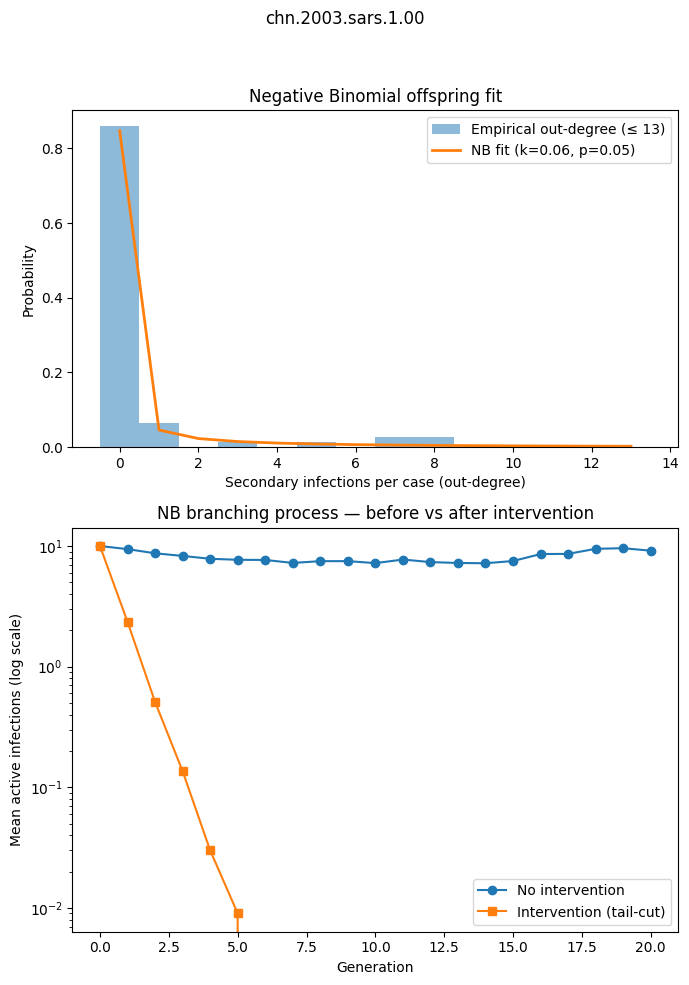


=== kor.2015.mers.1.00 ===
Cases: 186
Mean (R proxy): 0.9946
Variance:       45.5189
k (dispersion): 0.0222188
p:              0.021851
Intervention tail-cut k_max (policy-imposed): 5
[No intervention] Mean final size: 195.35
[No intervention] Median final size: 12.00
[No intervention] Extinction prob by gen 20: 0.975
[Intervention] Mean final size: 11.11
[Intervention] Median final size: 10.00
[Intervention] Extinction prob by gen 20: 1.000
Saved figure to: kor.2015.mers.1.00_intervention_compare.png


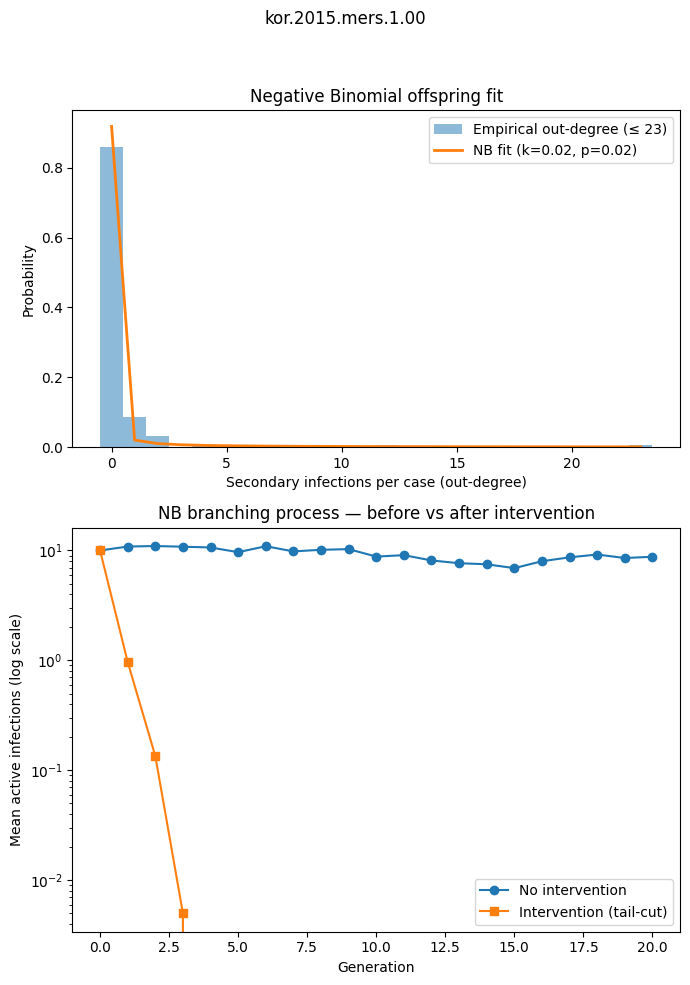


=== chn.2020.covid.1.00 ===
Cases: 20
Mean (R proxy): 0.9500
Variance:       3.6289
k (dispersion): 0.336886
p:              0.261784
Intervention tail-cut k_max (policy-imposed): 3
[No intervention] Mean final size: 145.85
[No intervention] Median final size: 50.00
[No intervention] Extinction prob by gen 20: 0.855
[Intervention] Mean final size: 19.50
[Intervention] Median final size: 18.00
[Intervention] Extinction prob by gen 20: 1.000
Saved figure to: chn.2020.covid.1.00_intervention_compare.png


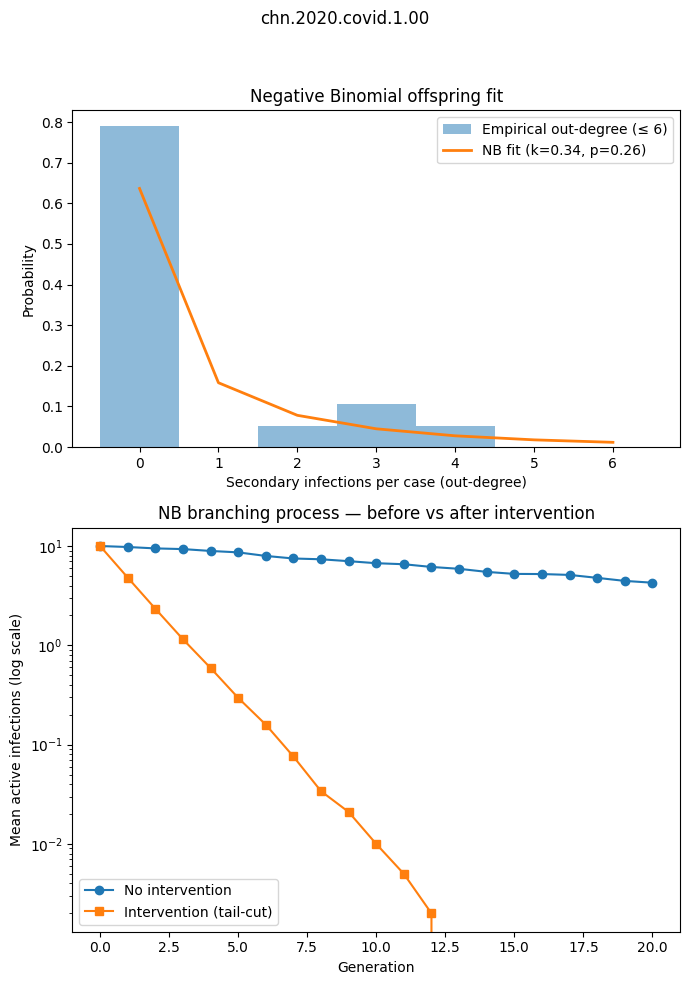

Saved final scatter to: combined_intervention_scatter.png
Saved tailcut effect plot to: tailcut_effect.png


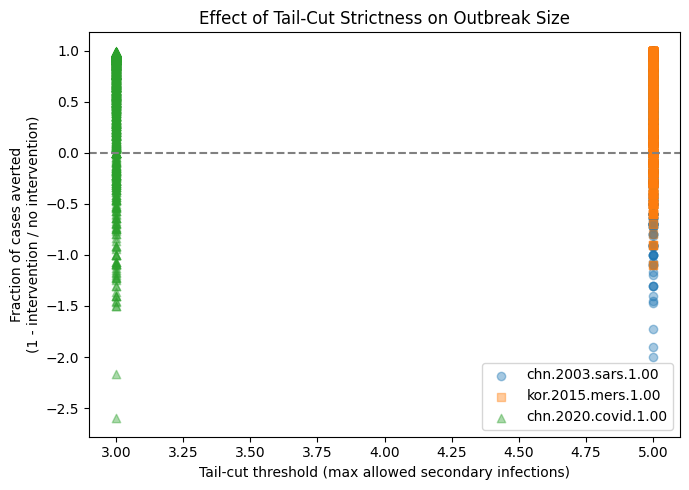

In [10]:
import polars as pl
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import nbinom  

# -----------------------------
#  Paths and outbreak selection
# -----------------------------
EDGES_PATH = "edgelists1.csv"

TARGET_DISEASES = [
    "chn.2003.sars.1.00",
    "kor.2015.mers.1.00",
    "chn.2020.covid.1.00",
]

# -----------------------------
#  Intervention settings
# -----------------------------
# How to handle the tail:
#   "resample" -> redraw until offspring <= k_max
#   "cap"      -> if offspring > k_max, set it to k_max
TAIL_METHOD = "resample"

# Number of simulations per scenario per disease
N_SIMS = 1000

# Policy-defined maximum allowed secondary infections per case
# (this is the tail-cut threshold k_max for each disease)
POLICY_CUTOFF = {
    "chn.2003.sars.1.00": 5,  # e.g. cap superspreading at 5 for SARS
    "kor.2015.mers.1.00": 5,  # cap at 5 for MERS
    "chn.2020.covid.1.00": 3, # cap at 3 for COVID-19
}

# -----------------------------
#  Load edges and build graph
# -----------------------------
edges_df = pl.read_csv(EDGES_PATH)  # expected columns: id, from, to

# Build a namespaced directed graph:
#   node format: "<outbreak_id>:<case_name>" (e.g. "chn.2003.sars.1.00:P1")
G = nx.DiGraph()
for rid, u, v in edges_df.select(["id", "from", "to"]).rows():
    u_ns = f"{rid}:{u}"
    v_ns = f"{rid}:{v}"
    G.add_edge(u_ns, v_ns)

# -----------------------------
#  Method-of-moments NB fitting
# -----------------------------
def fit_nb_mom(sample):
    """
    Fit a Negative Binomial to non-negative integer data via method-of-moments.

    Returns dict:
        - mean: sample mean
        - var:  sample variance (ddof=1)
        - k:    dispersion / "size" parameter
        - p:    success probability in SciPy's nbinom (on {0,1,2,...})

    NB parameterization (epidemic-style):
        Var = m + m^2 / k
        m = k(1-p)/p  =>  p = k / (k + m)
    """
    x = np.asarray(sample, dtype=float)
    if x.size == 0:
        return dict(mean=0.0, var=0.0, k=np.inf, p=1.0)

    m = x.mean()
    s2 = x.var(ddof=1) if x.size > 1 else 0.0

    if m <= 0:
        # no infections on average; NB not meaningful
        return dict(mean=m, var=s2, k=np.inf, p=1.0)

    if s2 > m:
        # overdispersed → true NB
        k = (m**2) / (s2 - m)
        p = k / (k + m)
    else:
        # not overdispersed → approximate Poisson by taking k very large
        k = 1e12
        p = k / (k + m)

    return dict(mean=m, var=s2, k=k, p=p)

# -----------------------------
#  Branching process simulator
#  (with optional tail-cut)
# -----------------------------
def simulate_branching(
    fit,
    max_generations=10,
    initial_cases=1,
    rng=None,
    k_max=None,
    tail_method="resample",
):
    """
    Galton–Watson branching process with NB offspring.

    - fit: dict from fit_nb_mom with keys 'mean', 'k', 'p'
    - max_generations: simulate generations G0..G_max
    - initial_cases: number of index cases at generation 0
    - rng: numpy.random.Generator (optional)
    - k_max: if not None, apply tail-cut per case (NB only)
    - tail_method: 'resample' or 'cap'

    Returns:
        list[int] = number of ACTIVE infections per generation [G0, G1, ..., G_max]
    """
    if rng is None:
        rng = np.random.default_rng()

    mu = fit["mean"]
    k  = fit["k"]
    p  = fit["p"]

    # If k is huge or infinite, treat as Poisson-like to avoid huge shape.
    # For Poisson-like case, we ignore k_max and just use aggregate Poisson.
    poisson_like = (k > 1e8) or np.isinf(k)

    sizes = [int(initial_cases)]
    current = int(initial_cases)

    for _ in range(max_generations):
        if current == 0:
            sizes.append(0)
            continue

        if poisson_like:
            # Sum of current Poisson(mu) RVs ~ Poisson(current * mu)
            new_cases = rng.poisson(mu * current)

        else:
            if k_max is None:
                # No intervention → use aggregate NB property:
                # Sum of current NB(k, p) ~ NB(current * k, p)
                r_total = current * k
                new_cases = nbinom.rvs(r_total, p, loc=0, random_state=rng)
            else:
                # Intervention: tail-cut per case.
                # Draw NB(k, p) for each case and truncate large values.
                draws = nbinom.rvs(k, p, size=current, loc=0, random_state=rng)

                if tail_method == "cap":
                    draws = np.minimum(draws, k_max)
                elif tail_method == "resample":
                    # Resample only those above k_max
                    mask = draws > k_max
                    while mask.any():
                        draws[mask] = nbinom.rvs(
                            k, p, size=mask.sum(), loc=0, random_state=rng
                        )
                        mask = draws > k_max
                else:
                    raise ValueError("tail_method must be 'resample' or 'cap'.")

                new_cases = int(draws.sum())

        new_cases = int(new_cases)
        sizes.append(new_cases)
        current = new_cases

    return sizes

# -----------------------------
#  Main analysis & simulation
# -----------------------------
rng = np.random.default_rng(42)

# store final-size results and cutoffs for summary plots
results = {}

for outbreak in TARGET_DISEASES:
    # Collect namespaced nodes that belong to this outbreak
    nodes_d = [n for n in G.nodes if n.startswith(outbreak + ":")]
    if not nodes_d:
        print(f"[WARN] No nodes found for {outbreak}. Check the id string.")
        continue

    # Induced subgraph for this outbreak
    H = G.subgraph(nodes_d).copy()

    # Secondary infections per case = out-degree in the directed graph
    deg_out = np.array([H.out_degree(n) for n in nodes_d], dtype=int)

    # Fit Negative Binomial via method-of-moments
    fit = fit_nb_mom(deg_out)

    # Console summary
    print(f"\n=== {outbreak} ===")
    print(f"Cases: {len(deg_out)}")
    print(f"Mean (R proxy): {fit['mean']:.4f}")
    print(f"Variance:       {fit['var']:.4f}")
    print(f"k (dispersion): {fit['k']:.6g}")
    print(f"p:              {fit['p']:.6f}")

    # Policy-imposed tail-cut threshold
    if len(deg_out) > 0:
        k_max_int = POLICY_CUTOFF.get(outbreak, int(deg_out.max()))
    else:
        k_max_int = None

    print(f"Intervention tail-cut k_max (policy-imposed): {k_max_int}")

    # -------------------------
    #  Branching process sims
    #  BEFORE vs AFTER intervention
    # -------------------------
    max_gen  = 20     # generations
    I0       = 10     # starting number of infectious individuals at generation 0

    has_deg = len(deg_out) > 0
    if has_deg:
        xmax_plot = min(int(np.percentile(deg_out, 99)), 40)
        x = np.arange(0, xmax_plot + 1)
        pmf_nb = nbinom.pmf(x, fit["k"], fit["p"], loc=0)

    # --- No intervention ---
    trajectories_no = [
        simulate_branching(
            fit,
            max_generations=max_gen,
            initial_cases=I0,
            rng=rng,
            k_max=None,               # no tail-cut
        )
        for _ in range(N_SIMS)
    ]

    traj_no_arr   = np.array(trajectories_no)  # (n_sims, max_gen+1)
    cum_no        = traj_no_arr.cumsum(axis=1)
    final_no      = cum_no[:, -1]
    ext_no        = (traj_no_arr[:, -1] == 0)

    print(f"[No intervention] Mean final size: {final_no.mean():.2f}")
    print(f"[No intervention] Median final size: {np.median(final_no):.2f}")
    print(f"[No intervention] Extinction prob by gen {max_gen}: {ext_no.mean():.3f}")

    # --- With intervention (tail-cut) ---
    if k_max_int is not None:
        trajectories_int = [
            simulate_branching(
                fit,
                max_generations=max_gen,
                initial_cases=I0,
                rng=rng,
                k_max=k_max_int,
                tail_method=TAIL_METHOD,
            )
            for _ in range(N_SIMS)
        ]

        traj_int_arr = np.array(trajectories_int)
        cum_int      = traj_int_arr.cumsum(axis=1)
        final_int    = cum_int[:, -1]
        ext_int      = (traj_int_arr[:, -1] == 0)

        print(f"[Intervention] Mean final size: {final_int.mean():.2f}")
        print(f"[Intervention] Median final size: {np.median(final_int):.2f}")
        print(f"[Intervention] Extinction prob by gen {max_gen}: {ext_int.mean():.3f}")
    else:
        # deg_out empty; just stub out a zero array for consistency
        traj_int_arr = np.zeros_like(traj_no_arr)
        final_int    = np.zeros_like(final_no)

    # ---- ONE FIGURE with two panels (offspring fit + branching) ----
    gens = np.arange(max_gen + 1)
    mean_by_gen_no  = traj_no_arr.mean(axis=0)
    mean_by_gen_int = traj_int_arr.mean(axis=0)

    fig, (ax_top, ax_bot) = plt.subplots(
        2, 1,
        figsize=(7, 10),
        gridspec_kw={"height_ratios": [1, 1.2]}
    )
    fig.subplots_adjust(hspace=0.4)

    # Upper: NB offspring fit
    if has_deg:
        ax_top.hist(
            deg_out[deg_out <= xmax_plot],
            bins=np.arange(-0.5, xmax_plot + 1.5, 1),
            density=True,
            alpha=0.5,
            label=f"Empirical out-degree (≤ {xmax_plot})"
        )
        ax_top.plot(
            x,
            pmf_nb,
            lw=2,
            label=f"NB fit (k={fit['k']:.2f}, p={fit['p']:.2f})"
        )
        ax_top.set_xlabel("Secondary infections per case (out-degree)")
        ax_top.set_ylabel("Probability")
        ax_top.set_title("Negative Binomial offspring fit")
        ax_top.legend()
    else:
        ax_top.text(
            0.5, 0.5, "No degree data",
            ha="center", va="center", transform=ax_top.transAxes
        )
        ax_top.set_axis_off()

    # Lower: branching process before vs after intervention
    ax_bot.plot(gens, mean_by_gen_no,  marker="o", label="No intervention")
    ax_bot.plot(gens, mean_by_gen_int, marker="s", label="Intervention (tail-cut)")
    ax_bot.set_yscale("log")
    ax_bot.set_xlabel("Generation")
    ax_bot.set_ylabel("Mean active infections (log scale)")
    ax_bot.set_title("NB branching process — before vs after intervention")
    ax_bot.legend()

    fig.suptitle(outbreak, y=0.98, fontsize=12)
    plt.tight_layout(rect=[0, 0, 1, 0.95])

    # Save per-disease figure for Overleaf
    fname = f"{outbreak}_intervention_compare.png"
    fig.savefig(fname, dpi=300, bbox_inches="tight")
    print(f"Saved figure to: {fname}")
    plt.show()  
    plt.close(fig)

    # Store results for summary plots
    results[outbreak] = {
        "final_no": final_no,
        "final_int": final_int,
        "cutoff": k_max_int,
    }

# -----------------------------
#  Combined scatterplot:
#  final size (no intervention)
#  vs cases averted
# -----------------------------
plt.figure(figsize=(7, 5))

markers = ["o", "s", "^"]
for (outbreak, vals), marker in zip(results.items(), markers):
    x = vals["final_no"]
    y = x - vals["final_int"]  # cases averted
    plt.scatter(x, y, alpha=0.4, label=outbreak, marker=marker)

plt.axhline(0, linestyle="--")
plt.xlabel("Final outbreak size (no intervention)")
plt.ylabel("Cases averted (no intervention − intervention)")
plt.title("Tail-cut NB intervention: outbreak size vs cases averted")
plt.legend()
plt.tight_layout()

combined_name = "combined_intervention_scatter.png"
plt.savefig(combined_name, dpi=300, bbox_inches="tight")
print(f"Saved final scatter to: {combined_name}")

plt.close()

# -----------------------------
#  Tail-cut threshold vs fraction of cases averted
# -----------------------------
plt.figure(figsize=(7, 5))

markers = ["o", "s", "^"]
for (outbreak, vals), marker in zip(results.items(), markers):
    no = vals["final_no"]
    inter = vals["final_int"]
    cutoff = vals["cutoff"]

    valid = no > 0
    no = no[valid]
    inter = inter[valid]

    frac_averted = 1 - (inter / no)

    plt.scatter(
        np.full_like(frac_averted, cutoff, dtype=float),
        frac_averted,
        alpha=0.4,
        marker=marker,
        label=outbreak,
    )

plt.axhline(0, linestyle="--", color="gray")
plt.xlabel("Tail-cut threshold (max allowed secondary infections)")
plt.ylabel("Fraction of cases averted\n(1 - intervention / no intervention)")
plt.title("Effect of Tail-Cut Strictness on Outbreak Size")
plt.legend()
plt.tight_layout()

plt.savefig("tailcut_effect.png", dpi=300, bbox_inches="tight")
print("Saved tailcut effect plot to: tailcut_effect.png")
plt.show()  
plt.close()


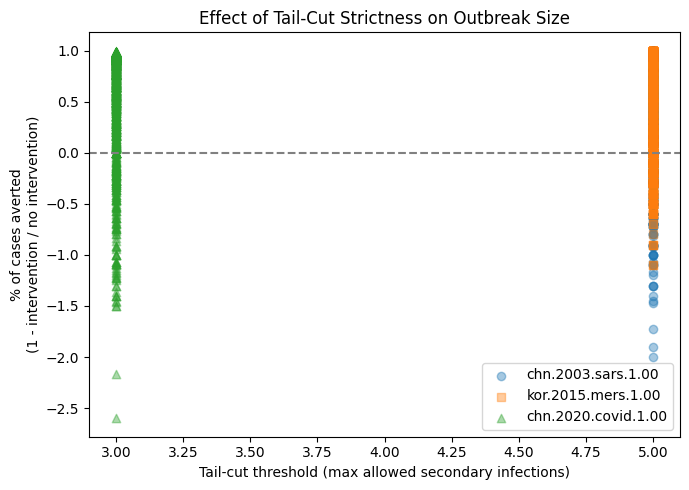

In [12]:
# -----------------------------
#  New plot:
#  Tail-cut threshold vs % cases averted
# -----------------------------

plt.figure(figsize=(7, 5))

markers = ["o", "s", "^"]
for (outbreak, vals), marker in zip(results.items(), markers):
    
    # Extract total cases
    no = vals["final_no"]
    inter = vals["final_int"]

    # Fraction remaining
    frac_remaining = inter / no
    
    # Percentage averted
    pct_averted = 1 - frac_remaining

    # X-axis: the cutoff value used (k_max_int)
    # assuming k_max stored already — if not, store it earlier in results dict
    cutoff = vals["cutoff"]  # <-- store when running simulations
    
    plt.scatter(
        np.full_like(pct_averted, cutoff),
        pct_averted,
        alpha=0.4,
        label=outbreak,
        marker=marker
    )

plt.axhline(0, linestyle="--", color="gray")
plt.xlabel("Tail-cut threshold (max allowed secondary infections)")
plt.ylabel("% of cases averted\n(1 - intervention / no intervention)")
plt.title("Effect of Tail-Cut Strictness on Outbreak Size")
plt.legend()
plt.tight_layout()

plt.savefig("tailcut_effect.png", dpi=300, bbox_inches="tight")
plt.show()


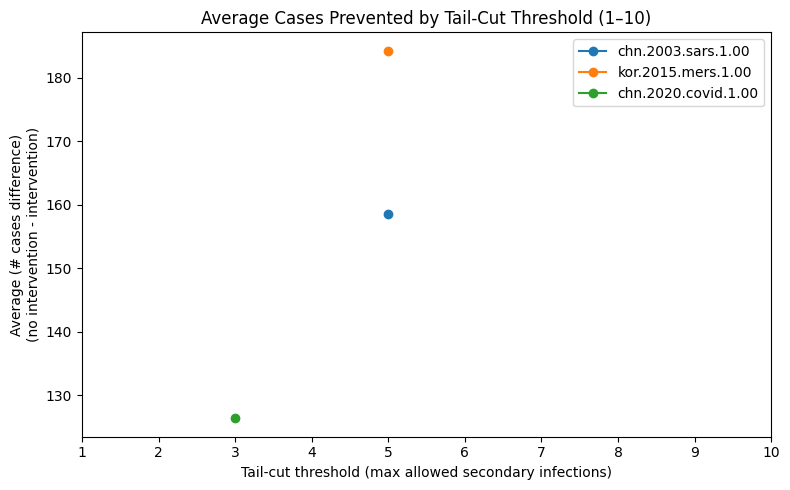

In [ ]:
plt.figure(figsize=(8, 5))

for outbreak, vals in results.items():
    
    no = np.array(vals["final_no"])
    inter = np.array(vals["final_int"])
    cutoff = np.array(vals["cutoff"])

    # Difference in total cases
    diff = no - inter

    # For thresholds 1–10, compute average difference
    thresholds = np.arange(1, 11) #changed it so we can achoose the threshold
    avg_diffs = []

    for k in thresholds:
        mask = cutoff == k
        if mask.sum() > 0:
            avg_diffs.append(diff[mask].mean())
        else:
            avg_diffs.append(np.nan)

    plt.plot(thresholds, avg_diffs, marker='o', label=outbreak)

plt.xlabel("Tail-cut threshold (max allowed secondary infections)")
plt.ylabel("Average (# cases difference)\n(no intervention - intervention)")
plt.title("Average Cases Prevented by Tail-Cut Threshold (1–10)")
plt.xticks(thresholds)
plt.legend()
plt.tight_layout()
plt.savefig("tailcut_avg_difference.png", dpi=300, bbox_inches="tight")
plt.show()

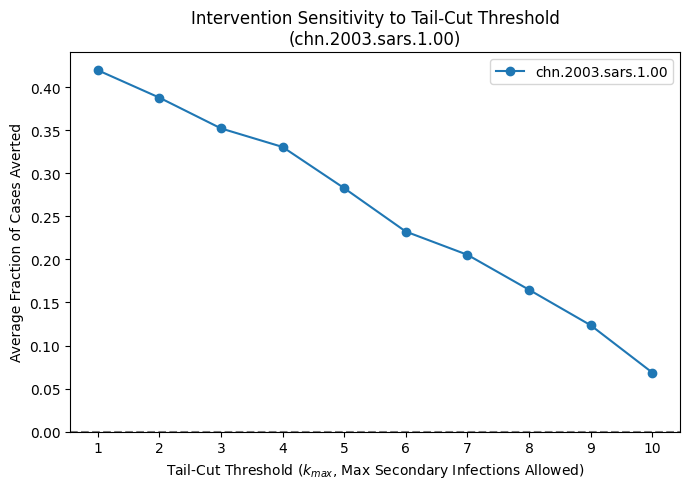


--- Sensitivity Analysis Summary: chn.2003.sars.1.00 ---
Mean Final Size (No Intervention): 171.49

Effectiveness by Tail-Cut Threshold ($k_{max}$):
shape: (10, 2)
┌───────┬─────────────────────────────────┐
│ k_max ┆ Avg. Frac Averted (No Extincti… │
│ ---   ┆ ---                             │
│ i64   ┆ f64                             │
╞═══════╪═════════════════════════════════╡
│ 1     ┆ 0.419549                        │
│ 2     ┆ 0.387705                        │
│ 3     ┆ 0.352011                        │
│ 4     ┆ 0.330475                        │
│ 5     ┆ 0.282639                        │
│ 6     ┆ 0.232272                        │
│ 7     ┆ 0.205324                        │
│ 8     ┆ 0.164746                        │
│ 9     ┆ 0.123568                        │
│ 10    ┆ 0.068653                        │
└───────┴─────────────────────────────────┘


In [ ]:
import polars as pl
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import nbinom
from pathlib import Path

# -----------------------------
#  Paths and outbreak selection
# -----------------------------
EDGES_PATH = "edgelists1.csv"
TARGET_DISEASE = "chn.2003.sars.1.00"

# -----------------------------
#  Simulation Settings for Range Analysis
# -----------------------------
TAIL_METHOD = "resample"
N_SIMS = 10
MAX_GEN = 20
I0 = 10  # Starting number of infectious individuals

# -----------------------------
#  Load edges and build graph
# -----------------------------
edges_df = pl.read_csv(EDGES_PATH)
G = nx.DiGraph()
for rid, u, v in edges_df.select(["id", "from", "to"]).rows():
    u_ns = f"{rid}:{u}"
    v_ns = f"{rid}:{v}"
    G.add_edge(u_ns, v_ns)

# Collect namespaced nodes that belong to this outbreak
nodes_d = [n for n in G.nodes if n.startswith(TARGET_DISEASE + ":")]
H = G.subgraph(nodes_d).copy()
deg_out = np.array([H.out_degree(n) for n in nodes_d], dtype=int)
rng = np.random.default_rng(42)

# -----------------------------
#  Method-of-moments NB fitting
# -----------------------------
def fit_nb_mom(sample):
    x = np.asarray(sample, dtype=float)
    if x.size == 0:
        return dict(mean=0.0, var=0.0, k=np.inf, p=1.0)
    m = x.mean()
    s2 = x.var(ddof=1) if x.size > 1 else 0.0
    if m <= 0:
        return dict(mean=m, var=s2, k=np.inf, p=1.0)
    if s2 > m:
        k = (m**2) / (s2 - m)
        p = k / (k + m)
    else:
        k = 1e12
        p = k / (k + m)
    return dict(mean=m, var=s2, k=k, p=p)

# -----------------------------
#  Branching process simulator
# -----------------------------
def simulate_branching(
    fit,
    max_generations=10,
    initial_cases=1,
    rng=None,
    k_max=None,
    tail_method="resample",
):
    if rng is None:
        rng = np.random.default_rng()
    mu = fit["mean"]
    k  = fit["k"]
    p  = fit["p"]
    poisson_like = (k > 1e8) or np.isinf(k)
    sizes = [int(initial_cases)]
    current = int(initial_cases)

    for _ in range(max_generations):
        if current == 0:
            sizes.append(0)
            continue
        if poisson_like or k_max is None:
            # Use aggregate Poisson or NB property
            if poisson_like:
                new_cases = rng.poisson(mu * current)
            else:
                r_total = current * k
                new_cases = nbinom.rvs(r_total, p, loc=0, random_state=rng)
        else:
            # Intervention: draw per case and truncate
            draws = nbinom.rvs(k, p, size=current, loc=0, random_state=rng)
            if tail_method == "cap":
                draws = np.minimum(draws, k_max)
            elif tail_method == "resample":
                mask = draws > k_max
                while mask.any():
                    draws[mask] = nbinom.rvs(
                        k, p, size=mask.sum(), loc=0, random_state=rng
                    )
                    mask = draws > k_max
            new_cases = int(draws.sum())

        new_cases = int(new_cases)
        sizes.append(new_cases)
        current = new_cases
    return sizes

# --- Perform Range Analysis ---
fit = fit_nb_mom(deg_out)
K_MAX_RANGE = np.arange(1, 11)  # k_max from 1 to 10
mean_final_no_intervention = 0.0  # To be calculated once

results_range = []

for k_max in K_MAX_RANGE:
    # 1. No Intervention Scenario (only run once)
    if k_max == K_MAX_RANGE[0]:
        trajectories_no = [
            simulate_branching(fit, max_generations=MAX_GEN, initial_cases=I0, rng=rng, k_max=None)
            for _ in range(N_SIMS)
        ]
        traj_no_arr = np.array(trajectories_no)
        final_no = traj_no_arr.cumsum(axis=1)[:, -1]
        mean_final_no_intervention = final_no.mean()
        
    # 2. Intervention Scenario
    trajectories_int = [
        simulate_branching(fit, max_generations=MAX_GEN, initial_cases=I0, rng=rng, k_max=k_max, tail_method=TAIL_METHOD)
        for _ in range(N_SIMS)
    ]
    traj_int_arr = np.array(trajectories_int)
    final_int = traj_int_arr.cumsum(axis=1)[:, -1]
    mean_final_intervention = final_int.mean()

    # 3. Calculate Fraction Averted
    valid_sims = final_no > 0 # only consider scenarios where outbreak didn't immediately go extinct
    frac_averted = np.mean(1 - (final_int[valid_sims] / final_no[valid_sims]))

    results_range.append({
        "k_max": k_max,
        "mean_final_no_intervention": mean_final_no_intervention,
        "mean_final_intervention": mean_final_intervention,
        "frac_averted": frac_averted
    })
    
# --- Plotting ---
df_range = pl.DataFrame(results_range)
k_max_values = df_range["k_max"].to_numpy()
frac_averted_values = df_range["frac_averted"].to_numpy()

plt.figure(figsize=(7, 5))
plt.plot(k_max_values, frac_averted_values, marker='o', linestyle='-', label=TARGET_DISEASE)
plt.axhline(0, color='gray', linestyle='--')
plt.xlabel("Tail-Cut Threshold ($k_{max}$, Max Secondary Infections Allowed)")
plt.ylabel("Average Fraction of Cases Averted")
plt.title(f"Intervention Sensitivity to Tail-Cut Threshold\n({TARGET_DISEASE})")
plt.xticks(K_MAX_RANGE)
plt.ylim(bottom=0)
plt.legend()
plt.tight_layout()
plt.show()

# --- Print Summary of Analysis ---
print(f"\n--- Sensitivity Analysis Summary: {TARGET_DISEASE} ---")
print(f"Mean Final Size (No Intervention): {mean_final_no_intervention:.2f}")
print("\nEffectiveness by Tail-Cut Threshold ($k_{max}$):")
print(df_range.select([pl.col('k_max').alias('k_max'), pl.col('frac_averted').alias('Avg. Frac Averted (No Extinction)')]))


C:\Users\benwu\AppData\Local\Temp\ipykernel_48152\496229894.py:169: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('hsv', num_diseases)


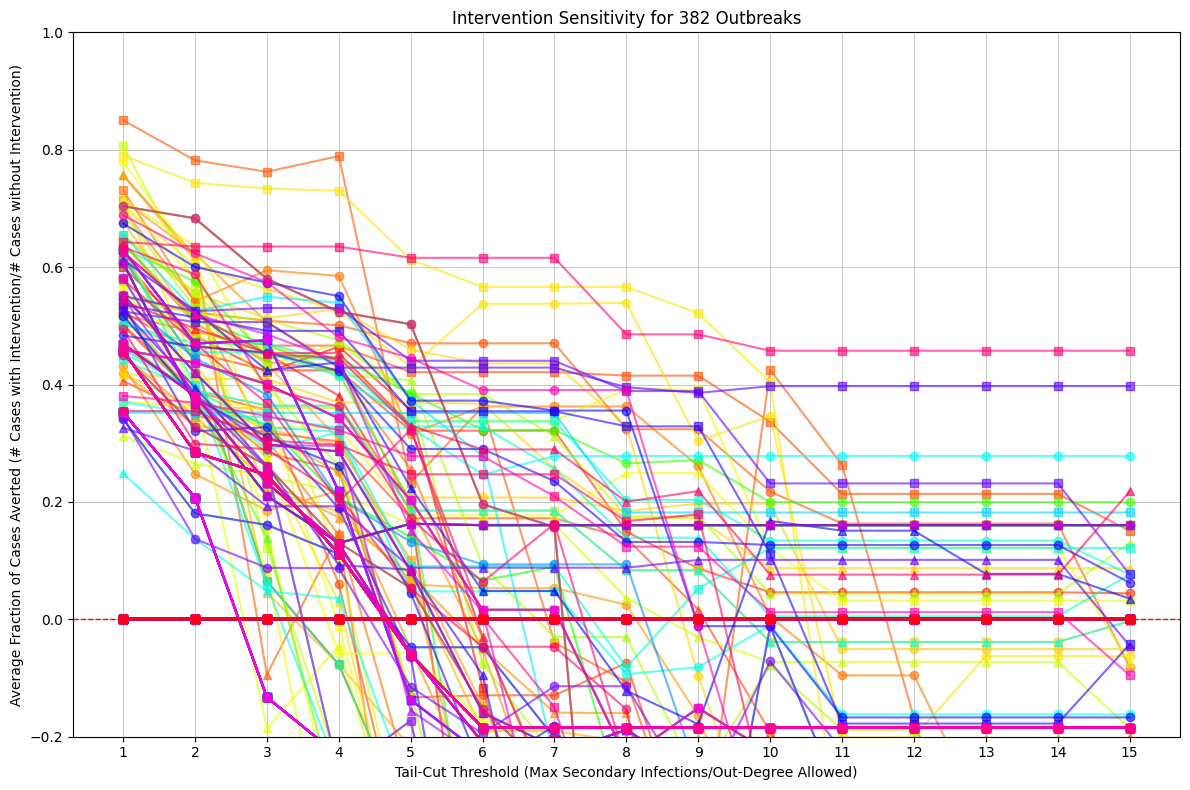

In [26]:
import pandas as pd
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import nbinom
from pathlib import Path

# --- File Paths ---


# -----------------------------
#  Method-of-moments NB fitting
# -----------------------------
def fit_nb_mom(sample):
    """Fit a Negative Binomial to non-negative integer data via method-of-moments."""
    x = np.asarray(sample, dtype=float)
    if x.size == 0:
        return dict(mean=0.0, var=0.0, k=np.inf, p=1.0)
    m = x.mean()
    s2 = x.var(ddof=1) if x.size > 1 else 0.0
    if m <= 0 or s2 <= m:
        # Not overdispersed or mean is zero: emulate Poisson by taking k very large
        k = 1e12
        p = k / (k + m) if m > 0 else 1.0
    else:
        # Overdispersed: solve method-of-moments for NB parameters
        k = (m**2) / (s2 - m)
        p = k / (k + m)
    return dict(mean=m, var=s2, k=k, p=p)

# -----------------------------
#  Branching process simulator
# -----------------------------
def simulate_branching(
    fit,
    max_generations=30, #30 generations ig to see where it really goes
    initial_cases=10,#we can change this to be like 1 or something idk
    rng=None,
    k_max=None,
    tail_method="resample",
):

    if rng is None:
        rng = np.random.default_rng()
    mu = fit["mean"]
    k  = fit["k"]
    p  = fit["p"]
    poisson_like = (k > 1e8) or np.isinf(k)
    sizes = [int(initial_cases)]
    current = int(initial_cases)

    for _ in range(max_generations):
        if current == 0:
            sizes.append(0)
            continue
        
        if poisson_like or k_max is None:
            if poisson_like:
                new_cases = rng.poisson(mu * current)
            else:
                r_total = current * k
                new_cases = nbinom.rvs(r_total, p, loc=0, random_state=rng)
        else:
            # Intervention: draw NB(k, p) for each case and truncate/resample
            draws = nbinom.rvs(k, p, size=current, loc=0, random_state=rng)
            if tail_method == "cap":
                draws = np.minimum(draws, k_max)
            elif tail_method == "resample":
                mask = draws > k_max
                while mask.any():
                    draws[mask] = nbinom.rvs(
                        k, p, size=mask.sum(), loc=0, random_state=rng
                    )
                    mask = draws > k_max
            new_cases = int(draws.sum())

        new_cases = int(new_cases)
        sizes.append(new_cases)
        current = new_cases
    return sizes

# -----------------------------
#  Main Analysis Function
# -----------------------------
def run_full_sensitivity_analysis():
    # Load data
    edges_df = pd.read_csv("edgelists1.csv")
    nodes_df = pd.read_csv("node_info1.csv")


    # 1. Get ALL unique disease IDs (preserving order as requested)
    id_list = edges_df['id'].unique().tolist()
    
    # Global simulation parameters
    N_SIMS = 10
    MAX_GEN = 15
    I0 = 10
    K_MAX_RANGE = np.arange(1, 16)  # k_max from 1 to 10
    RNG = np.random.default_rng(42)

    all_results = []
    
    # 2. Iterate through all diseases, fit NB, and run simulations
    for outbreak in id_list:
        
        # Prepare outbreak data
        e_outbreak = edges_df[edges_df['id'] == outbreak]
        n_outbreak = nodes_df[nodes_df['id'] == outbreak]['name'].unique()
        
        # Identify all nodes for this outbreak in the full graph to ensure we capture
        # all possible cases, including those with zero secondary infections.
        node_to_degree = {n: 0 for n in n_outbreak}

        # Calculate out-degree (secondary infections)
        out_counts = e_outbreak.groupby('from')['to'].count().to_dict()
        node_to_degree.update(out_counts)
        deg_out = np.array(list(node_to_degree.values()), dtype=int)
        
        #if len(deg_out) < 2: #doesn't matter we want to run for all trees
             # Skip outbreaks with too few cases/edges for meaningful statistics
        #    continue
        
        fit = fit_nb_mom(deg_out)
        
        # 3. Run 'No Intervention' Scenario (Final Size Distribution)
        rng_sim = np.random.default_rng(42) 
        trajectories_no = [
            simulate_branching(fit, max_generations=MAX_GEN, initial_cases=I0, rng=rng_sim, k_max=None)
            for _ in range(N_SIMS)
        ]
        traj_no_arr = np.array(trajectories_no)
        final_no = traj_no_arr.cumsum(axis=1)[:, -1]
        
        valid_sims = final_no > 0
        final_no_valid = final_no[valid_sims]
        
        if len(final_no_valid) < 5:
            # Skip if nearly all 'no intervention' runs went extinct
            continue
        
        # 4. Run 'Intervention' Scenario for each k_max
        for k_max in K_MAX_RANGE:
            rng_sim = np.random.default_rng(42) # Reset RNG for intervention run
            trajectories_int = [
                simulate_branching(fit, max_generations=MAX_GEN, initial_cases=I0, rng=rng_sim, k_max=k_max, tail_method="resample")
                for _ in range(N_SIMS)
            ]
            traj_int_arr = np.array(trajectories_int)
            final_int = traj_int_arr.cumsum(axis=1)[:, -1]
            
            # Calculate Average Fraction Averted (over non-extinct runs)
            final_int_valid = final_int[valid_sims]
            cases_averted_valid = final_no_valid - final_int_valid
            frac_averted = np.mean(cases_averted_valid / final_no_valid)

            # Store results
            all_results.append({
                "disease": outbreak,
                "k_max": k_max,
                "avg_fraction_averted": frac_averted,
            })

    # 5. Plotting Combined Line Plot
    df_combined = pd.DataFrame(all_results)
    
    # Prepare plotting styles: use a marker for every disease but limit line colors 
    # and only show a subset of labels for readability on a busy plot.
    num_diseases = len(df_combined['disease'].unique())
    colors = plt.cm.get_cmap('hsv', num_diseases) 
    #markers = ['o', 's', '^', 'D', 'p', 'h', '*', 'X', 'P', 'v', '<', '>']
    
    plt.figure(figsize=(12, 8))
    
    for i, outbreak in enumerate(df_combined['disease'].unique()):
        data = df_combined[df_combined["disease"] == outbreak]
        
        # Only label a small subset of the most overdispersed/well-known for clarity
        label = outbreak if outbreak in ["chn.2003.sars.1.00", "kor.2015.mers.1.00", "chn.2020.covid.1.00"] else None #I guess laveling the important 3 that we did before but we don't really need a legend bc its just showing all ur looking at overall trend
        
        plt.plot(
            data["k_max"].values,
            data["avg_fraction_averted"].values,
            marker=markers[i % len(markers)],
            linestyle='-',
            color=colors(i),
            label=label,
            alpha=0.6,
            linewidth=1.5
        )

    plt.axhline(0, color='red', linestyle='--', linewidth=1.0, label='Zero Cases Averted')
    plt.xlabel("Tail-Cut Threshold (Max Secondary Infections/Out-Degree Allowed)")
    plt.ylabel("Average Fraction of Cases Averted (# Cases with Intervention/# Cases without Intervention)")
    plt.title(f"Intervention Sensitivity for {num_diseases} Outbreaks")
    plt.xticks(K_MAX_RANGE)
    plt.ylim(bottom=-0.2, top=1.0)
    
    
    plt.grid(True, which='both', linestyle='-', linewidth=0.5)
    plt.tight_layout()
    plt.show()

# Execute the analysis
run_full_sensitivity_analysis()